# A code example: The distribution of transaction volume

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def binning(x,y,nbin=10,eq = True):
    step = (np.max(x)-np.min(x))/(nbin)
    X = []
    Y = []
    Yerr = []
    tmpY = []
    start = np.min(x)+step
    if eq:
        for i in range(len(x)):
            while x[i] > start:
                X.append(start-step/2)
                Y.append(np.mean(tmpY))
                #Xerr.append(np.std(tmpX,ddof=1) /np.sqrt(len(tmpX)) )
                Yerr.append(np.std(tmpY,ddof=1) /np.sqrt(len(tmpY)) )
                start += step
                tmpY=[]
                pass
            tmpY.append(y[i])
            pass
        if len(tmpY)!=0:
            X.append(start-step/2)
            Y.append(np.mean(tmpY))
            Yerr.append(np.std(tmpY,ddof=1) /np.sqrt(len(tmpY)) )
        return X,Y,Yerr
        pass
    else:
        tmpX = []
        Xerr = []
        for i in range(len(x)):
            while x[i] > start:
                X.append(np.mean(tmpX))
                Y.append(np.mean(tmpY))
                Xerr.append(np.std(tmpX,ddof=1) /np.sqrt(len(tmpX)) )
                Yerr.append(np.std(tmpY,ddof=1) /np.sqrt(len(tmpY)) )
                start += step
                tmpX=[]
                tmpY=[]
                pass
            tmpX.append(x[i])
            tmpY.append(y[i])
            pass
        if len(tmpY)!=0:
            X.append(np.mean(tmpX))
            Y.append(np.mean(tmpY))
            Xerr.append(np.std(tmpX,ddof=1) /np.sqrt(len(tmpX)) )
            Yerr.append(np.std(tmpY,ddof=1) /np.sqrt(len(tmpY)) )
        return X, Y, Yerr

In [4]:
def PreProcessing(t,vol):
    T = np.zeros(len(t))
    Vol = np.zeros(len(t))
    prev = t[0]
    n = 0
    for i in range(len(t)):
        n += (prev != t[i])
        T[n] = t[i]
        Vol[n] += vol[i]
        prev = t[i]
        pass
    return T[:n+1],Vol[:n+1]

In [6]:
INTC_LOB   = np.sort(["../../Data/INTC/"+i for i in os.listdir("../../Data/INTC") if i[-8]=="k"])
TSLA_LOB   = np.sort(["../../Data/TSLA/"+i for i in os.listdir("../../Data/TSLA") if i[-8]=="k"])
INTC_order = np.sort(["../../Data/INTC/"+i for i in os.listdir("../../Data/INTC") if i[-8]!="k"])
TSLA_order = np.sort(["../../Data/TSLA/"+i for i in os.listdir("../../Data/TSLA") if i[-8]!="k"])

In [12]:
Vol = []
for i,z in zip(TSLA_order,TSLA_LOB):
    data = pd.read_csv(i,header=None)[[0,1,3]]
    execution = data[(data[1] == 4) | (data[1] == 5)][[0,3]].values
    a,b = PreProcessing(execution[:,0],execution[:,1])
    Vol.extend(b.copy())
    pass

In [9]:
pd.read_csv(i,header=None)

,0,1,2,3,4,5
0,34200.006789,5,0,13,2228300,1
1,34200.034290,6,-1,17011,2228700,-1
2,34200.034290,1,5519048,11,2227500,1
3,34200.034290,1,2142274,10,2230000,-1
4,34200.034290,1,2629509,200,2226000,1
...,...,...,...,...,...,...
216706,57599.977910,4,267961846,39,2193100,-1
216707,57599.977910,4,267963915,61,2193100,-1
216708,57599.977975,1,267983787,100,2191900,1
216709,57599.978001,3,267981940,100,2193100,-1


In [13]:
TSLA_Vol = []
for i,z in zip(TSLA_order,TSLA_LOB):
    data = pd.read_csv(i,header=None)[[0,1,3]]
    execution = data[(data[1] == 4) | (data[1] == 5)][[0,3]].values
    a,b = PreProcessing(execution[:,0],execution[:,1])
    TSLA_Vol.extend(b.copy())
    pass

INTC_Vol = []
for i,z in zip(INTC_order,INTC_LOB):
    data = pd.read_csv(i,header=None)[[0,1,3]]
    execution = data[(data[1] == 4) | (data[1] == 5)][[0,3]].values
    a,b = PreProcessing(execution[:,0],execution[:,1])
    INTC_Vol.extend(b.copy())
    pass


In [15]:
import powerlaw

In [16]:
powerlaw.Fit(TSLA_Vol,discrete=True).alpha

Calculating best minimal value for power law fit
/home/yuki/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/yuki/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


3.2547061509138007

In [17]:
powerlaw.Fit(INTC_Vol,discrete=True).alpha

Calculating best minimal value for power law fit


3.1605614255106373

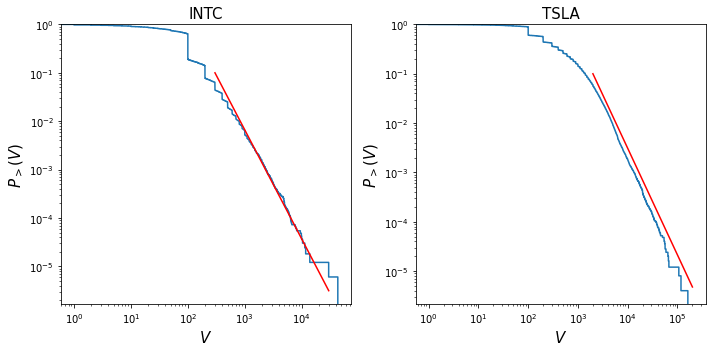

In [25]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5),tight_layout=True)

sns.ecdfplot(TSLA_Vol,complementary=True,ax=ax1)
ax1.plot([100*3,10000*3],[0.1,0.1*10**(-2.25*2)],color="red")
sns.ecdfplot(INTC_Vol,complementary=True,ax=ax2)
ax2.plot([1000*2,100000*2],[0.1,0.1*10**(-2.16*2)],color="red")
#ax1.scatter(t,INTC_acf,zorder=0)
#x,y,yerr = binning(np.log10(t),INTC_acf,25)
#ax1.errorbar(10**np.array(x),y,yerr = yerr,color="red",marker="v",mec="black",capthick=2,capsize=2,ecolor="black",zorder=1)

#ax2.scatter(t,TSLA_acf,zorder=0)
#x,y,yerr = binning(np.log10(t),TSLA_acf,25)
#ax2.errorbar(10**np.array(x),y,yerr = yerr,color="red",marker="v",mec="black",capthick=2,capsize=2,ecolor="black",zorder=1)

ax1.set_yscale("log")
ax1.set_xscale("log")
ax2.set_yscale("log")
ax2.set_xscale("log")
ax1.set_title("INTC",fontsize=15)
ax1.set_xlabel(r"$V$",fontsize=15)
ax1.set_ylabel(r"$P_{>}(V)$",fontsize=15)

ax2.set_title("TSLA",fontsize=15)
ax2.set_xlabel(r"$V$",fontsize=15)
ax2.set_ylabel(r"$P_{>}(V)$",fontsize=15)
plt.savefig("TransactionVolume_MO.png")
plt.savefig("../../../docs/CodeExample/StylizedFacts/TransactionVolume_MO.png")


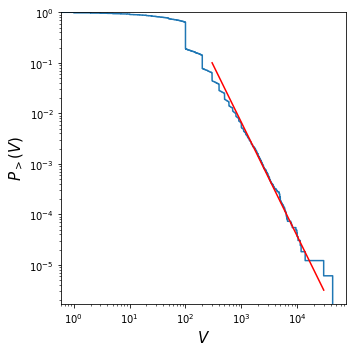

In [26]:
fig,(ax1) = plt.subplots(1,1,figsize=(5,5),tight_layout=True)

sns.ecdfplot(TSLA_Vol,complementary=True,ax=ax1)
ax1.plot([100*3,10000*3],[0.1,0.1*10**(-2.25*2)],color="red")
ax1.set_yscale("log")
ax1.set_xscale("log")
#ax1.set_title("INTC",fontsize=15)
ax1.set_xlabel(r"$V$",fontsize=15)
ax1.set_ylabel(r"$P_{>}(V)$",fontsize=15)
plt.savefig("../../../docs/CodeExample/StylizedFacts/TransactionVolume_MO.png")